## 1. Load Data

In [2]:
from numpy import array
from pyspark.mllib.clustering import GaussianMixture, GaussianMixtureModel

In [3]:
# Load and parse the data
data = sc.textFile("s3://csed516/smalldatasetspark/wise-colors-15-20-subsetsmall8.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.strip().split(',')[1:]]))

## 2. Data Analysis: Run GMM

### 2.1 Find and describe components

Find and describe components: Use the MLlib implementation of GMM with k=7 components to build a model of the data. List the weight, mean(mu), and covariance matrix of each component. Run this experiment on a 2-node (i.e., 2-instance) cluster. On each instance, run a single worker. If you choose to change the number of partitions, report the number of partitions. (20 Points)

In [4]:
# Build the model (cluster the data)
gmm = GaussianMixture.train(parsedData, 7)

# output parameters of model
for i in range(7):
    print("weight = ", gmm.weights[i], 
          "mu = ", gmm.gaussians[i].mu,
          "sigma = ", gmm.gaussians[i].sigma.toArray())

('weight = ', 0.32072135571290289, 'mu = ', DenseVector([1.4697, 2.2313, 3.4419, 0.1904]), 'sigma = ', array([[ 0.45076322,  0.33225034, -0.05240522, -0.02853419],
       [ 0.33225034,  0.33627646, -0.0608692 , -0.0545616 ],
       [-0.05240522, -0.0608692 ,  0.26603113, -0.00376351],
       [-0.02853419, -0.0545616 , -0.00376351,  0.17172045]]))
('weight = ', 0.013505775109016245, 'mu = ', DenseVector([1.8731, 5.3558, 1.4314, -0.0603]), 'sigma = ', array([[ 9.87560536, -0.80738687,  0.59183106,  0.20682213],
       [-0.80738687,  7.08473731, -0.85829036,  0.42463979],
       [ 0.59183106, -0.85829036,  4.25015422, -0.6989247 ],
       [ 0.20682213,  0.42463979, -0.6989247 ,  0.43370517]]))
('weight = ', 0.058851266933090361, 'mu = ', DenseVector([0.6523, 2.203, 3.5667, 0.5613]), 'sigma = ', array([[ 0.06575207, -0.06079751,  0.03086436, -0.04009632],
       [-0.06079751,  0.86267634, -0.20549607, -0.01421172],
       [ 0.03086436, -0.20549607,  0.19968881, -0.06800081],
       [-0.040

### 2.2 Plot the source clusters

Plot the source clusters:Each point is represented in four dimensions(X,Y,Z,W). Plot one or more 3D or 2D plots with a subset of the dimensions of your choosing to show the sources with each cluster of points denoted by a different color. (10 Points)

In [3]:
%matplotlib inline
import matplotlib . pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import time

In [6]:
# Get cluster for each point
labels = gmm.predict(parsedData).collect()

In [8]:
# Transfer RDD to pandas dataframe
pddf = pd.DataFrame(parsedData.collect(), columns = ['X', 'Y', 'Z', 'W'])
pddf.head()

,X,Y,Z,W
0,0.575469,1.37509,1.941,-0.036
1,1.007350,3.06909,3.701,-0.059
2,1.468400,2.50721,3.184,-0.105
3,0.761256,1.44754,1.356,-0.096
4,1.072450,2.14364,2.340,-0.116


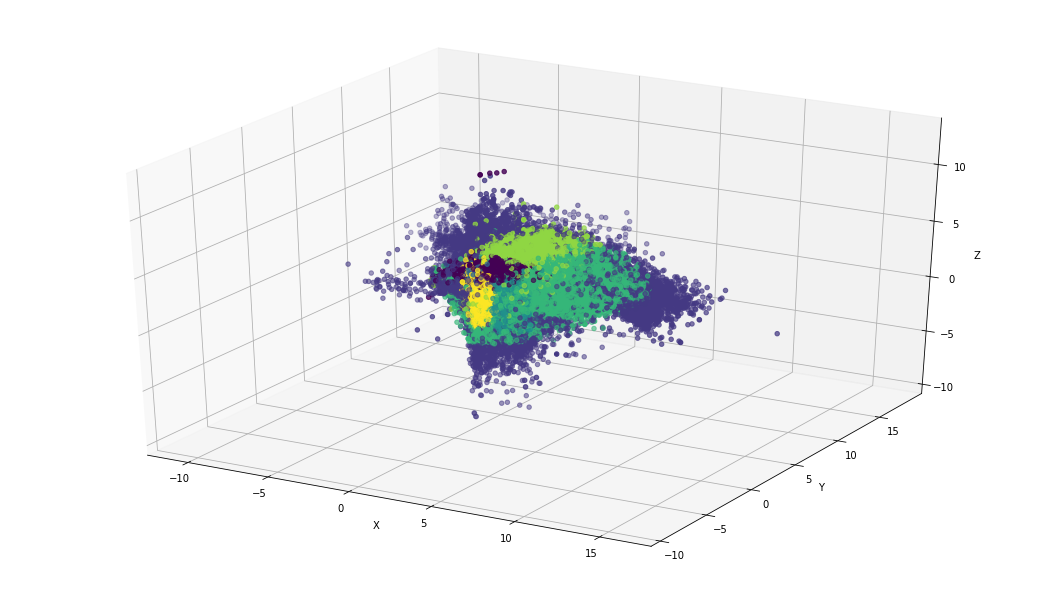

In [13]:
# Draw 3D plot with a subset of the dimensions, X, Y, Z
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pddf['X'],pddf['Y'],pddf['Z'],c=labels) 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

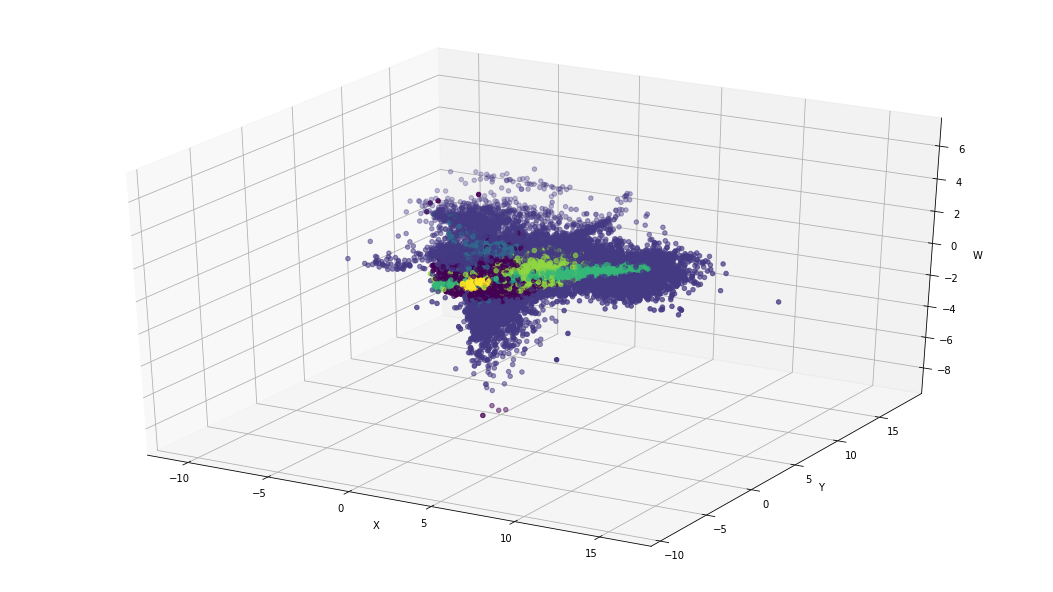

In [11]:
# Draw 3D plot with a subset of the dimensions, X, Y, W
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pddf['X'],pddf['Y'],pddf['W'],c=labels) 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('W')
plt.show()

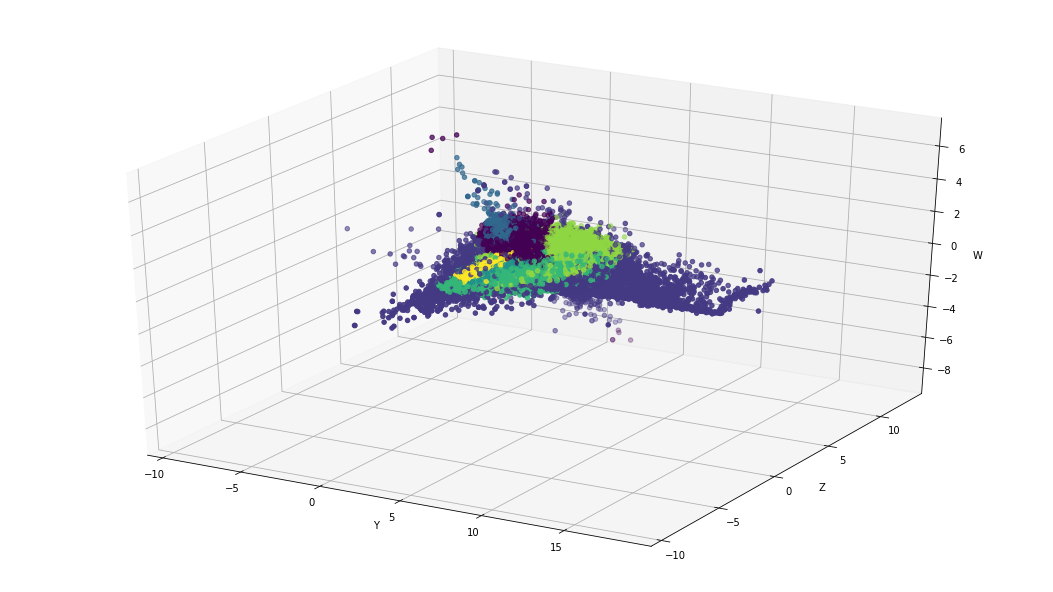

In [14]:
# Draw 3D plot with a subset of the dimensions, Y, Z, W
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pddf['Y'],pddf['Z'],pddf['W'],c=labels) 
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('W')
plt.show()

### 2.3 Speed-up

Speed-up: In this part of the assignment, we will evaluate Spark's speed-up on the GMM algorithm. For this, we keep the data size and task fixed and vary the number of cores/compute nodes available for processing. Please answer the following question How does the runtime vary when we change the number of instances in the Spark cluster? Vary the number of instances from 2 to 4 to 8 and plot the runtime for finding 7 components as in question 1. You already ran part 1 with 2 instances. For this part, you only need to run GMM on 4 and 8 instance clusters. You can continue to use one worker per instance. Report the runtimes. If you choose to change the number of partitions, report the number of partitions. (20 Points)

In [2]:
# Record the runtime for finding 7 components as in question 1 with 2 instances

start = time.time()

# Load and parse the data
data = sc.textFile("s3://csed516/smalldatasetspark/wise-colors-15-20-subsetsmall8.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.strip().split(',')[1:]]))

# Build the model (cluster the data)
gmm = GaussianMixture.train(parsedData, 7)
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

00:13:28.72


In [4]:
# Record the runtime for finding 7 components as in question 1 with 4 instances

start = time.time()

# Load and parse the data
data = sc.textFile("s3://csed516/smalldatasetspark/wise-colors-15-20-subsetsmall8.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.strip().split(',')[1:]]))

# Build the model (cluster the data)
gmm = GaussianMixture.train(parsedData, 7)
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

00:12:43.47


In [5]:
# Record the runtime for finding 7 components as in question 1 with 8 instances 1

start = time.time()

# Load and parse the data
data = sc.textFile("s3://csed516/smalldatasetspark/wise-colors-15-20-subsetsmall8.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.strip().split(',')[1:]]))

# Build the model (cluster the data)
gmm = GaussianMixture.train(parsedData, 7)
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

00:12:22.71


Answer: The runtime of running GMM on 2 instance clusters is 13 min 28.72 s. The runtime of running GMM on 4 instance clusters is 12 min 43.47 s. The runtime of running GMM on 2 instance clusters is 12 min 22.71 s.

### 2.4 Scale-up

4.Scale-up: In this part, we increase the data set size and see how the change in the data size impacts the analysis time. For this a larger dataset with 15M sources is located at:
bucket: csed516
key: largerdatasetspark/wise-colors-15-20-subset1.csv 
Run GMM on this larger dataset and on the 2 node cluster. Report the execution time as well the number of partitions for this dataset. Compare the components that you get on this larger dataset vs the one your got on the sample. (20 Points)

In [3]:
# Get runtime of running GMM on large dataset
start = time.time()

# Load and parse the data
data = sc.textFile("s3://csed516/largerdatasetspark/wise-colors-15-20-subset1.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.strip().split(',')[1:]]))

# Build the model (cluster the data)
gmm = GaussianMixture.train(parsedData, 7)
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

00:38:14.76


Answer: The runtime of running GMM on this larger dataset is about 38 min 14.76s

In [5]:
labels_large = gmm.predict(parsedData).collect()

In [4]:
# Build the model (cluster the data)
gmm = GaussianMixture.train(parsedData, 7)

# output parameters of model
for i in range(7):
    print("weight = ", gmm.weights[i], 
          "mu = ", gmm.gaussians[i].mu,
          "sigma = ", gmm.gaussians[i].sigma.toArray())

('weight = ', 0.12859743226055606, 'mu = ', DenseVector([1.7936, 3.1893, 2.5086, 0.0254]), 'sigma = ', array([[ 0.65300141,  0.44621348,  0.04539921,  0.00784217],
       [ 0.44621348,  0.60798534,  0.02330359, -0.00436565],
       [ 0.04539921,  0.02330359,  1.16917067,  0.01828378],
       [ 0.00784217, -0.00436565,  0.01828378,  0.0277382 ]]))
('weight = ', 0.17335664550517743, 'mu = ', DenseVector([0.8428, 1.7193, 3.4907, 0.2246]), 'sigma = ', array([[ 0.06419734,  0.05735496, -0.0080155 , -0.01417473],
       [ 0.05735496,  0.16749138, -0.041069  , -0.05454777],
       [-0.0080155 , -0.041069  ,  0.24423526,  0.00272475],
       [-0.01417473, -0.05454777,  0.00272475,  0.2187295 ]]))
('weight = ', 0.21121083819343683, 'mu = ', DenseVector([2.1961, 2.7219, 2.2187, 0.0054]), 'sigma = ', array([[ 0.26781601,  0.19486371, -0.02701663,  0.04337803],
       [ 0.19486371,  0.16878826, -0.02839026,  0.03123522],
       [-0.02701663, -0.02839026,  0.92133388, -0.02478402],
       [ 0.04337

Answer: the weights of each cluster of small dataset and large dataset are different. In the small dataset, the weights of four clusters is about 0.2. The highest weight of cluster is 0.22. However, the highest weight of cluster is 0.32 in large dataset. I'm not sure if the orders of 7 clusters in two datasets are exactly the same. If it is, then the weight, mean and covariance matrix of each component for two datasets are quite different.

5.Data Management and analysis: Generate different-size subsets of the larger dataset (you can use selections to extract subsets of the data). Run the GMM algorithm on those subsets. Comment on the query execution time and on the components that you find. (10 points)

In [4]:
# Load and parse large dataset
data = sc.textFile("s3://csed516/largerdatasetspark/wise-colors-15-20-subset1.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.strip().split(',')[1:]]))

In [5]:
parsedData.count()

15575834

In [7]:
# Randomly get a subset of 50% of the orginal dataset
data_sub1 = parsedData.sample(True,.5)

In [9]:
start = time.time()
# Build the model (cluster the data)
gmm1 = GaussianMixture.train(data_sub1, 7)
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

00:23:00.25


Answer: The runtime of running GMM on this subset of large dataset is about 23 min 0.25s

In [10]:
# output parameters of model
for i in range(7):
    print("weight = ", gmm1.weights[i], 
          "mu = ", gmm1.gaussians[i].mu,
          "sigma = ", gmm1.gaussians[i].sigma.toArray())

('weight = ', 0.16423049608963822, 'mu = ', DenseVector([2.0767, 2.6703, 3.4602, 0.2044]), 'sigma = ', array([[ 0.20133111,  0.13776056, -0.07084511, -0.02898386],
       [ 0.13776056,  0.18101198, -0.07085482, -0.0596965 ],
       [-0.07084511, -0.07085482,  0.25889846, -0.01184706],
       [-0.02898386, -0.0596965 , -0.01184706,  0.17015918]]))
('weight = ', 0.2273455805382549, 'mu = ', DenseVector([0.9281, 1.8506, 3.5034, 0.2364]), 'sigma = ', array([[ 0.09368221,  0.09144035, -0.00960499, -0.01507913],
       [ 0.09144035,  0.21454828, -0.03655712, -0.05479225],
       [-0.00960499, -0.03655712,  0.24954869, -0.0017103 ],
       [-0.01507913, -0.05479225, -0.0017103 ,  0.21615745]]))
('weight = ', 0.19869185929787034, 'mu = ', DenseVector([0.88, 1.6811, 2.3071, -0.0756]), 'sigma = ', array([[  7.28915930e-02,   7.38751391e-02,  -2.28212718e-02,
         -8.30690796e-04],
       [  7.38751391e-02,   9.12312581e-02,  -2.89002256e-02,
         -5.62670334e-05],
       [ -2.28212718e-0

In [11]:
# Randomly get a subset of 70% of the orginal dataset
data_sub2 = parsedData.sample(True,.7)

In [12]:
start = time.time()

# Build the model (cluster the data)
gmm2 = GaussianMixture.train(data_sub2, 7)
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

00:21:36.66


Answer: The runtime of running GMM on this subset of large dataset is about 21 min 36.66 s

In [13]:
# output parameters of model
for i in range(7):
    print("weight = ", gmm2.weights[i], 
          "mu = ", gmm2.gaussians[i].mu,
          "sigma = ", gmm2.gaussians[i].sigma.toArray())

('weight = ', 0.1154250061822971, 'mu = ', DenseVector([1.8257, 3.2503, 2.431, 0.0083]), 'sigma = ', array([[ 0.65423732,  0.43329712,  0.0657169 ,  0.01047606],
       [ 0.43329712,  0.59234086,  0.0459361 ,  0.00531061],
       [ 0.0657169 ,  0.0459361 ,  1.18255916,  0.01281913],
       [ 0.01047606,  0.00531061,  0.01281913,  0.02292397]]))
('weight = ', 0.21671455916104349, 'mu = ', DenseVector([1.9166, 2.5133, 1.9357, -0.0091]), 'sigma = ', array([[ 0.45415598,  0.33916005,  0.01537856,  0.048505  ],
       [ 0.33916005,  0.27924977,  0.00746407,  0.03608674],
       [ 0.01537856,  0.00746407,  0.76364546, -0.01143092],
       [ 0.048505  ,  0.03608674, -0.01143092,  0.01379953]]))
('weight = ', 0.018515269906896798, 'mu = ', DenseVector([1.7639, 5.2506, 0.8481, -0.0006]), 'sigma = ', array([[  7.35071495e+00,  -8.81300531e-01,   6.64657515e-01,
          5.96409557e-02],
       [ -8.81300531e-01,   4.80062231e+00,   5.21169590e-01,
          1.72287436e-02],
       [  6.64657515

In [14]:
# Randomly get a subset of 30% of the orginal dataset
data_sub3 = parsedData.sample(True,.3)

In [15]:
start = time.time()

# Build the model (cluster the data)
gmm3 = GaussianMixture.train(data_sub3, 7)
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

00:09:04.60


Answer: The runtime of running GMM on this subset of large dataset is about 9 min 4.60 s

In [16]:
# output parameters of model
for i in range(7):
    print("weight = ", gmm3.weights[i], 
          "mu = ", gmm3.gaussians[i].mu,
          "sigma = ", gmm3.gaussians[i].sigma.toArray())

('weight = ', 0.21231306321873428, 'mu = ', DenseVector([2.1857, 2.7179, 2.201, 0.0046]), 'sigma = ', array([[ 0.27461061,  0.19859939, -0.02442836,  0.04360114],
       [ 0.19859939,  0.17225587, -0.02681685,  0.03135666],
       [-0.02442836, -0.02681685,  0.91689369, -0.02354251],
       [ 0.04360114,  0.03135666, -0.02354251,  0.01982367]]))
('weight = ', 0.0332608493674185, 'mu = ', DenseVector([1.0162, 3.0795, 3.6337, 0.3252]), 'sigma = ', array([[ 0.3368922 , -0.05438495,  0.15860064, -0.1375002 ],
       [-0.05438495,  0.8064101 , -0.35145466,  0.02321484],
       [ 0.15860064, -0.35145466,  0.93978154, -0.39912932],
       [-0.1375002 ,  0.02321484, -0.39912932,  0.57477174]]))
('weight = ', 0.019389592203459007, 'mu = ', DenseVector([1.7472, 5.1878, 0.8377, 0.0025]), 'sigma = ', array([[  7.12634061e+00,  -8.31931305e-01,   6.57832677e-01,
          5.91800604e-02],
       [ -8.31931305e-01,   4.87147433e+00,   5.77458912e-01,
          1.29989737e-02],
       [  6.57832677e-

Answer: the sizes of three subsets are 0.3, 0.5, 0.7 of the original large dataset. The runtimes of running GMM are 9 min 4.60s, 21 min 36.66s and 23 min 0.25s. As the size of data increases, the runtime of running GMM is also increasing. But we don't have sufficient evidence to prove that the runtime is increasing linearly, or the runtime is proportional to the data size.

There is no obvious evidence shows that the weight, mean and covariance matrix are similar to each other. 

6.Data Management and analysis: On the large dataset, repeat the experiment by running GMM using three out of four of the available dimensions. Comment on the query execution time and on the components that you find. (20 points)

In [17]:
# Running GMM using three dimensions, X, Y, Z
start = time.time()

# Load and parse the data
data = sc.textFile("s3://csed516/largerdatasetspark/wise-colors-15-20-subset1.csv")
parsedData1 = data.map(lambda line: array([float(x) for x in line.strip().split(',')[1:4]]))

# Build the model (cluster the data)
gmm = GaussianMixture.train(parsedData1, 7)
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

00:27:00.08


In [18]:
# output parameters of model
for i in range(7):
    print("weight = ", gmm.weights[i], 
          "mu = ", gmm.gaussians[i].mu,
          "sigma = ", gmm.gaussians[i].sigma.toArray())

('weight = ', 0.13720620649068588, 'mu = ', DenseVector([1.8259, 2.9181, 2.3922]), 'sigma = ', array([[ 0.61914076,  0.53343719,  0.04326021],
       [ 0.53343719,  0.59613425,  0.14337739],
       [ 0.04326021,  0.14337739,  1.7681848 ]]))
('weight = ', 0.21632783059303798, 'mu = ', DenseVector([1.9874, 2.6166, 3.3831]), 'sigma = ', array([[ 0.28521245,  0.2005311 , -0.11062408],
       [ 0.2005311 ,  0.2172411 , -0.10876423],
       [-0.11062408, -0.10876423,  0.31887466]]))
('weight = ', 0.19604297082353964, 'mu = ', DenseVector([0.8759, 1.8493, 3.4231]), 'sigma = ', array([[ 0.06942895,  0.07177857, -0.01006843],
       [ 0.07177857,  0.21738405, -0.05695792],
       [-0.01006843, -0.05695792,  0.29297514]]))
('weight = ', 0.082503731890672435, 'mu = ', DenseVector([1.3189, 3.2426, 3.0252]), 'sigma = ', array([[ 0.41041549,  0.09464186,  0.01782086],
       [ 0.09464186,  0.69640585, -0.3026127 ],
       [ 0.01782086, -0.3026127 ,  1.03665688]]))
('weight = ', 0.01557659402447094, 

In [19]:
# Running GMM using three dimensions, Y, Z, W
start = time.time()

# Load and parse the data
data = sc.textFile("s3://csed516/largerdatasetspark/wise-colors-15-20-subset1.csv")
parsedData2 = data.map(lambda line: array([float(x) for x in line.strip().split(',')[2:5]]))

# Build the model (cluster the data)
gmm = GaussianMixture.train(parsedData2, 7)
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

00:29:52.14


In [20]:
# output parameters of model
for i in range(7):
    print("weight = ", gmm.weights[i], 
          "mu = ", gmm.gaussians[i].mu,
          "sigma = ", gmm.gaussians[i].sigma.toArray())

('weight = ', 0.10501944725785724, 'mu = ', DenseVector([3.3831, 2.371, 0.0522]), 'sigma = ', array([[ 0.99108754, -0.40301817, -0.04109196],
       [-0.40301817,  1.35731915,  0.00995094],
       [-0.04109196,  0.00995094,  0.01667139]]))
('weight = ', 0.0093453743155048809, 'mu = ', DenseVector([5.3288, 0.3774, 0.0217]), 'sigma = ', array([[  9.66761912e+00,   1.61897145e+00,   4.92484241e-02],
       [  1.61897145e+00,   2.46162679e+00,   8.65875400e-03],
       [  4.92484241e-02,   8.65875400e-03,   6.37493077e-02]]))
('weight = ', 0.20743685914227067, 'mu = ', DenseVector([2.11, 3.6535, 0.4361]), 'sigma = ', array([[ 0.37418744, -0.0212325 , -0.07268051],
       [-0.0212325 ,  0.17034499, -0.02878209],
       [-0.07268051, -0.02878209,  0.20113588]]))
('weight = ', 0.18343885006048019, 'mu = ', DenseVector([2.5208, 3.023, 0.1601]), 'sigma = ', array([[ 0.44354134, -0.09286618,  0.00271332],
       [-0.09286618,  0.36257741,  0.03825986],
       [ 0.00271332,  0.03825986,  0.048557

Answer: the runtime of running GMM using three dimensions, X, Y, Z is 27min. The runtime of running GMM using three dimensions, Y, Z, W is about 30 min. There is no significant difference among the execution time of two different dimensions. 

